# Исследование данных интернет-магазина "Стримчик"

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Необходимо спланировать кампанию на 2017-й, отработать принцип работы с данными. 

    
## Описание данных
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Цель исследования:**
1. Проанализировать информацию по играм и на основе исследований выбрать актуальный временной период, который поможет построить прогноз на 2017 год.
2. Проанализировать данные по играм в актуальном периоде, найти критерии влияющие на продажу в разных регионах: Северная Америка, Европа и Япония. Составить портрет пользователя для каждого региона.
3. Проверить гипотезы о поведении пользователей в отношении некоторых платформ и жанров игр.


**Ход исследования:**
1. Прочитать данные из файла и сохранить в датафрем.
2. Обзор данных.
3. Предобработка данных.
4. Расчеты и формирование новых датафреймов и столбцов.
5. Анализ полученных результатов исследования данных.
6. Проверка гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

import re

from math import sqrt

## Загрузка данных

### Файл с данными и изучение общей информации

In [2]:
# Чтение данных из csv-файла в датафрейм и сохранение в переменную games_df 
# Путь к файлу: /datasets/games.csv
try:
    games_df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except FileNotFoundError as e:
    print(f"FileNotFoundError successfully handled\n"
          f"{e}")


In [3]:
# Вывод первых 10 строчек датафрейма games_df на экран
games_df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Вывод основной информации о датафрейме games_df с помощью метода info().
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Проверка количества пропущенных значений по каждому столбцу в датафрейме games_df
games_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

### Вывод

Предварительный обзор данных показал:
- необходимо переименовать столбцы датафрейма для удобства их использования в дальнейшем, необходимо преобразовать буквы верхнего регистра в нижний.
- много пропущенных значений, необходимо проанализировать каждый столбец отдельно: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. Принять решение: восстановить, удалить или оставить значения без изменений
- несоответствие типа данных в некоторых столбцах, например, `Year_of_Release` - `Год выпуска`, должно быть целочисленным типом.
- удалить явные дубликаты, если такие существуют.

## Предобработка данных

In [6]:
def print_isnull_by_column(column):
    # Проверка количества пропущенных значений по столбцу @column в датафрейме games_df

    isnull_count = games_df[column].isna().sum()
    
    print('Количество строк с пропущенными значениями в поле "{0}": {1}'.format(column, isnull_count), end='')
    
    # Подсчет процента пропущенных записей по столбцу @column в датафрейме games_df
    print(' ({:.0%} от общего количества записей).'.format(isnull_count/games_df.shape[0]))



In [7]:
# Количество записей в датафрейме games_df до изменений
games_count = games_df.shape[0]

### Переименование столбцов

In [8]:
# Переименование столбцов в датафрейме games_df
games_df.columns = games_df.columns.str.lower()

### Работа с пропусками

#### `name` - `Название игры`

In [9]:
# Информация о количестве строк с пропущенными значениями в поле name датафрейма games_df
print_isnull_by_column('name')

Количество строк с пропущенными значениями в поле "name": 2 (0% от общего количества записей).


Удаляем такие строки, в которых поле `name` - `Название игры` не заполнено, таких записей всего 2.

In [10]:
# Удаление объявлений с пустым значением name
games_df = games_df.dropna(subset=['name'])

#### `genre` - `Жанр игры`

In [11]:
# Информация о количестве строк с пропущенными значениями в поле genre датафрейма games_df
print_isnull_by_column('genre')

Количество строк с пропущенными значениями в поле "genre": 0 (0% от общего количества записей).


Пропущенные значения в этом столбце пропали после удаления игр без названия.

#### `year_of_release` - `Год выпуска`

In [12]:
# Информация о количестве строк с пропущенными значениями в поле year_of_release датафрейма games_df
print_isnull_by_column('year_of_release')

Количество строк с пропущенными значениями в поле "year_of_release": 269 (2% от общего количества записей).


In [13]:
# Удаление объявлений с пустым значением year_of_release
games_df = games_df.dropna(subset=['year_of_release'])


Поменяем тип столбца для параметра `year_of_release` на целочисленный, потому что год всегда целое число, и с ним будет удобнее работать при дальнейшем анализе данных.

In [14]:

# Поменяем тип данных столбцу year_of_release на int
games_df['year_of_release'] = games_df['year_of_release'].astype('int')


#### `critic_score` - `Оценка критиков`

In [15]:
# Информация о количестве строк с пропущенными значениями в поле critic_score датафрейма games_df
print_isnull_by_column('critic_score')


Количество строк с пропущенными значениями в поле "critic_score": 8461 (51% от общего количества записей).


In [16]:
# Список возможных значений в поле critic_score
games_df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Пропущенных значений больше 50%, восстановить этот параметр мы никак не можем. Оставим данные как есть без изменений. Удалять тоже не будем.

Отсутствие данного параметра у игр в целом вполне логично, ни каждой игре критики дают оценки.

Тип поля float оставим без изменений.

#### `user_score` - `Оценка пользователей`

In [17]:
# Информация о количестве строк с пропущенными значениями в поле user_score датафрейма games_df
print_isnull_by_column('user_score')


Количество строк с пропущенными значениями в поле "user_score": 6605 (40% от общего количества записей).


In [18]:
# Список возможных значений в поле user_score
games_df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропущенных значений больше 40%, восстановить этот параметр мы так же никак не сможем. Оставим данные как есть без изменений. Удалять тоже не будем.

Отсутствие данного параметра тоже логично - игру никто не оценил. 

Помимо пропущенных значений в поле `user_score` есть значение `tbd`. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

Значит строки со значением `user_score = tbd` это тоже строки с пропущенным значением в поле `user_score`. Проставим туда значение NaN, аналогичное другим пропущенным значениям. Поменяем тип поля на float, потому что рейтинг это непрерывное значение в пределах от 0 до 10.


In [19]:
# Смена значения 'tbd' на Nan, потому что это тоже неопределенное значение
games_df['user_score'] = games_df['user_score'].replace('tbd', np.nan)

# Поменяем тип данных столбцу user_score на float64
games_df['user_score'] = games_df['user_score'].astype('float64')

In [20]:
# Список возможных значений в поле user_score
games_df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [21]:
# Информация о количестве строк с пропущенными значениями в поле user_score датафрейма games_df
print_isnull_by_column('user_score')

Количество строк с пропущенными значениями в поле "user_score": 8981 (55% от общего количества записей).


Пропущенных значений стало еще больше - 55%, но они и были неопределены ранее. При этом данные выглядят теперь более понятно, все пропущенные значения приведены к одному формату.

#### `rating` - `Рейтинг от организации ESRB`

In [22]:
# Информация о количестве строк с пропущенными значениями в поле rating датафрейма games_df
print_isnull_by_column('rating')

Количество строк с пропущенными значениями в поле "rating": 6676 (41% от общего количества записей).


In [23]:
# Список возможных значений в поле rating
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно [Рейтинг ESRD](https://www.esrb.org/ratings-guide/#rating_cat):
- `EC` («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- `E` («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults"):
- `E10+` («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
- `T` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- `M` («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- `AO` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- `RP` («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:
- `RP 17+` («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант


Поменяем для игр рейтинг `K-A` на `E` в соотвествии с описанием рейтинга.

In [24]:
# Простановка рейтингу 'K-A' рейтинга 'E'
games_df['rating'] = games_df['rating'].replace('K-A', 'E')

У 41% игр нет рейтинга ESRB. Эти возрастные рейтинги помогают потребителям решить, подходит ли игра для предполагаемого пользователя, и гарантируют, что дети не увидят неприемлемый контент.

Пропуск значений скорее всего не связан с ошибой заполнения данных, потому что рейтинг ESRB проставляется для игр из США и Канады.

Восстановить недостающие данные мы не можем. Чтобы значение NaN не мешало нам в анализе данных интернет-магазина, проставим всем таким строкам значение `NA` - что будем интерпретировать, как неопределенный рейтинг игры.

In [25]:
# Проставляем в столбце rating значение NA вместо NaN
games_df['rating'] = games_df['rating'].fillna('NA')

In [26]:
# Список возможных значений в поле rating
games_df['rating'].unique()

array(['E', 'NA', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
# Информация о количестве строк с пропущенными значениями в поле rating датафрейма games_df
print_isnull_by_column('rating')

Количество строк с пропущенными значениями в поле "rating": 0 (0% от общего количества записей).


### Удаление дубликатов

Подсчитаем количество явных дубликатов в датафрейме `games_df`

In [28]:
games_df.duplicated().sum()

0

Явных дубликатов нет, т.е. полностью одинаковые строки отсутствуют. Проверим датафрейм на наличие неявных дубликатов. Посмотрим есть ли повторы совокупности значений: имя, платформа и год релиза.

In [29]:
games_df.loc[games_df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Отобразим все такие строки, у которых название "Madden NFL 13", платформа PS3 и год релиза игры 2012.

In [30]:
games_df.loc[(games_df['name'] == 'Madden NFL 13') & (games_df['platform'] == 'PS3') & (games_df['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


В датафрейме есть неявный дубликат по игре "Madden NFL 13" (платформа PS3 и год релиза игры 2012). Удалим строку с индексом 16230, потому что в ней продажи по регионам почти везде нулевые, первая строка с аналогичной игрой выглядит более корректной.

In [31]:
games_df = games_df.drop(index=[16230])

In [32]:
games_df.loc[(games_df['name'] == 'Madden NFL 13') & (games_df['platform'] == 'PS3') & (games_df['year_of_release'] == 2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


Удаление прошло корректно, оставлена верная строка. Больше неявных дубликатов нет.

### Суммарные продажи все всех регионах

Добавим новый столбец, в который запишем суммарные продажи во всех регионах

In [33]:
# Добавление нового столбца all_sales - суммарные продажи во всех регионах
games_df['all_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

### Вывод

In [34]:
# Проверка количества записей в датафрейме games_df
print('В результате предобработки датафрейм games_df сократился на {0} записей'.format(games_count - games_df.shape[0]))


В результате предобработки датафрейм games_df сократился на 272 записей


In [35]:
# Вывод основной информации о датафрейме games_df с помощью метода info().
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [36]:
# Проверка количества пропущенных значений по каждому столбцу в датафрейме games_df
games_df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
all_sales             0
dtype: int64

In [37]:
# Вывод первых 10 строчек датафрейма games_df на экран
games_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NA,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NA,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NA,28.31


Предобработка завершена.

Данные от интернет-магазина "Стримчик" были не в самом хорошем виде.
Столбцы имели некрасивые названия, были проблемы с типом данных, а так же наблюдалось большое количество данных с пропущенными значениями некоторых параметров. Почти в половине всех строк отсутствуют значения `Оценка пользователей`, `Оценка критиков` и `Рейтинг от организации ESRB`. 

Названия столбцов и их типы были подкорректированы в соотвествии со значениями данных. 

Были подкорректированы некоторые пропущенные значения:
- удалены строки с пропусками в поле `Название игры`.
- восстановлен `Год выпуска игры` из названия игры, где восстановить не удалось - такие строки удалили.
- в поле `Оценка пользователя` значения 'tbd' изменены на Nan, так как по сути это такие же пропуски.
- пропуски в полях `Оценка пользователей` и `Оценка критиков` оставили без изменений, удаление таких больших данных плохо повлияет на качество результатов исследования.
- в поле `Рейтинг от организации ESRB` пропуски заменены на значение 'NA' - не определено, подкорректированы данные и названия согласно классификации по организации ESRB.

Вероятнее всего разработчикам интернет-магазина "Стримчик" необходимо найти на сторонных сайтах информацию о рейтингах и оценках, и пополнить свои данные для большей наглядности и удобства пользователей.



In [38]:
# Посмотрим, что осталось
temp = games_df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## Исследовательский анализ

In [39]:
# Список основных статистических характеристик данных по числовым столбцам датафрейма games_df
games_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,16443.000000,7982.000000,7462.000000,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,7.126548,0.536055
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,1.499429,1.558828
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [40]:
# Функция поиска "усов" размаха данных
def iqr_parameter (column):
    
    q1, q2 = (games_df[column].describe())['25%'], (games_df[column].describe())['75%']
    # Межквартильый размах 
    iqr = q2 - q1
    # "Усы" размаха
    iqr_mn = q1 - 1.5*iqr
    iqr_mx = q2 + 1.5*iqr

    print('"Усы" размаха: [', iqr_mn, ';', iqr_mx, ']')
    
    return (iqr_mn, iqr_mx)


In [41]:
def draw_bar(df, title_name, x_name, y_name):
    (
        df
        .plot(
            kind='bar', 
            title=title_name, 
            xlabel=x_name, 
            ylabel=y_name, 
            figsize=(12,6),
            grid=True, 
        )
    )
    plt.show()   

In [42]:
def draw_pie(df, title_name):
    (
        df
        .plot(
            kind='pie', 
            title=title_name, 
            figsize=(9,6),
            autopct='%.2f%%',
            legend=True
        )
    )
    plt.show()    

In [43]:
# Функция для построения данных для круговой диаграммы по топ-5 значений, остальные объединяются в категорию "Other"
def create_top_5_pie_data(df, paramert, column):
    
    # Получение топ-5 значений "paramert" по максимальным суммарным значениям из поля "column"
    condition = df.groupby(paramert)[column].sum().sort_values(ascending = False).head(5).index

    # Заполняем top_5_pie_data суммарными значениями для топ-5
    top_5_pie_data = (
        df
        .loc[df[paramert].isin(condition)]
        .groupby(paramert)[column]
        .sum()
    )
    
    # Заполняем top_5_pie_data суммарными значениями для остальных, объединяем из в категорию "Other"
    top_5_pie_data = pd.concat([
        top_5_pie_data,
        pd.Series(
            [df.loc[~df[paramert].isin(condition)][column].sum()], 
            index=["Other"]
        )
    ])

    # Вывод на печать промежуточного датафрейма
#    display(top_5_pie_data.sort_values())
    
    return top_5_pie_data.sort_values()
    

### Выпуск игр по годам

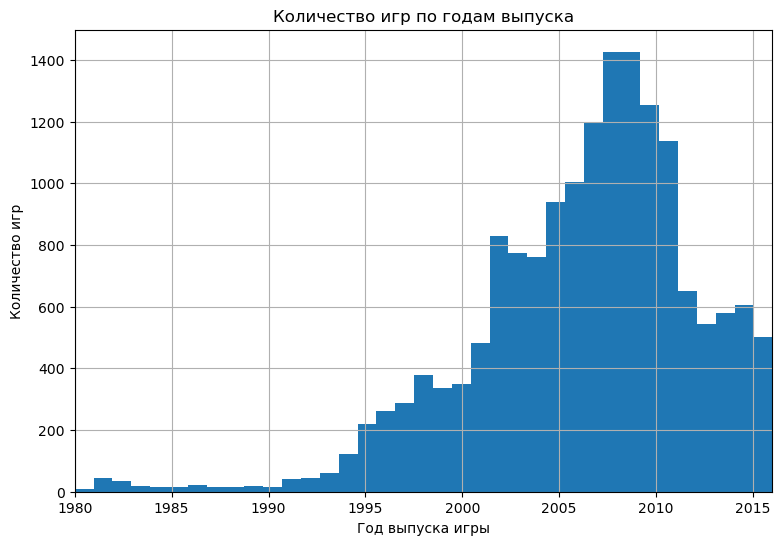

In [44]:
# Построение гистограммы по данным из столбца year_of_release датафрейма `games_df`
(
    games_df['year_of_release']
    .plot(
        kind='hist', 
        title='Количество игр по годам выпуска', 
        bins=37, 
        xlim=(1980,2016), 
        grid=True, 
        figsize=(9,6)
    )
)

plt.xlabel("Год выпуска игры")
plt.ylabel("Количество игр")

plt.show()



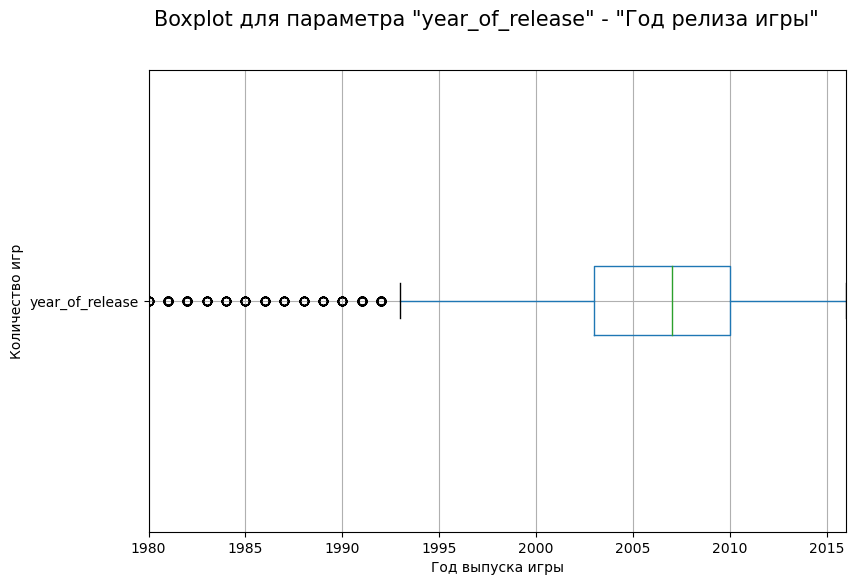

In [45]:
# Диаграмма размаха для столбца year_of_release датафрейма games_df
plt.figure(figsize=(9, 6))  
plt.xlim(1980, 2016)

games_df.boxplot(column='year_of_release', vert=False)
                 
plt.suptitle('Boxplot для параметра "year_of_release" - "Год релиза игры"', fontsize=15) 
plt.xlabel("Год выпуска игры")
plt.ylabel("Количество игр")

plt.show()

В интернет-магазине "Стримчик" есть игры начиная с 1980 года. Больше всего игр было выпущено в 2006-2007 годах. Основная масса дат релизов игр лежит в диапазоне с 2003 по 2010 год. 

Судя по графикам, игры, вышедшие в релиз раньше 1993 года, совсем неактуальны для нашего исследования.

### Продажи по платформам. Поиск актуального временного периода для дальнейшего анализа

In [46]:
# Список 10-ти платформ с максимальными суммарными продажами за весь период
ids = games_df.groupby('platform')['all_sales'].agg(['sum']).sort_values(by='sum', ascending = False ).head(10).index
ids


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

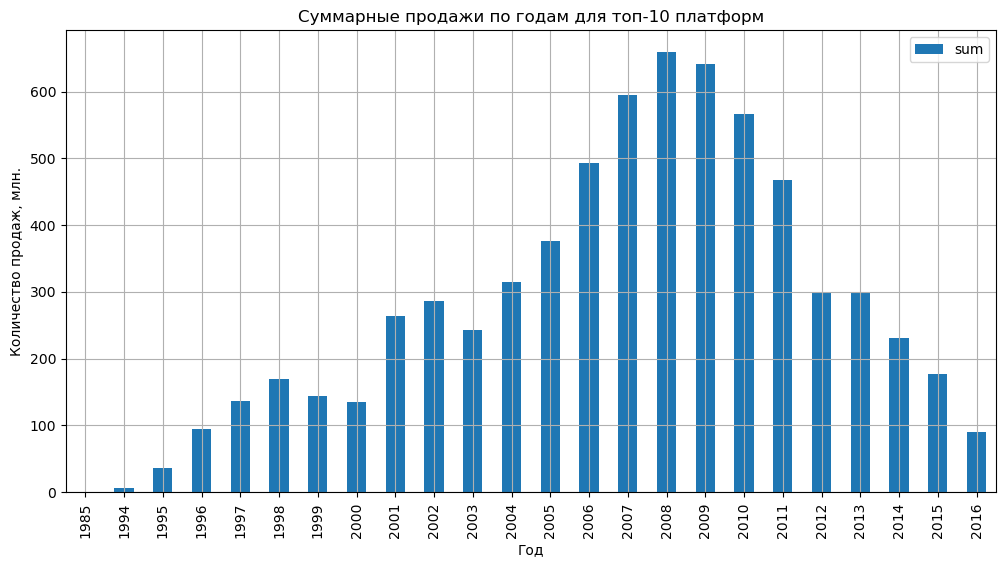

In [47]:
# Построение графика суммарных продаж по годам выпуска игр в датафрейме games_df для 10-ти платформ с максимальными продажами
draw_bar(
     games_df.query('platform in @ids').groupby('year_of_release')['all_sales'].agg(['sum']),
    'Суммарные продажи по годам для топ-10 платформ',
    'Год',
    'Количество продаж, млн.'
)


Список 10 платформ с самыми высокими продажами игр: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS.

На графике зависимости общего количества продаж от года выпуска игры для топ-10 платформ значения достигают пиков в районе 2008-2009 года. 

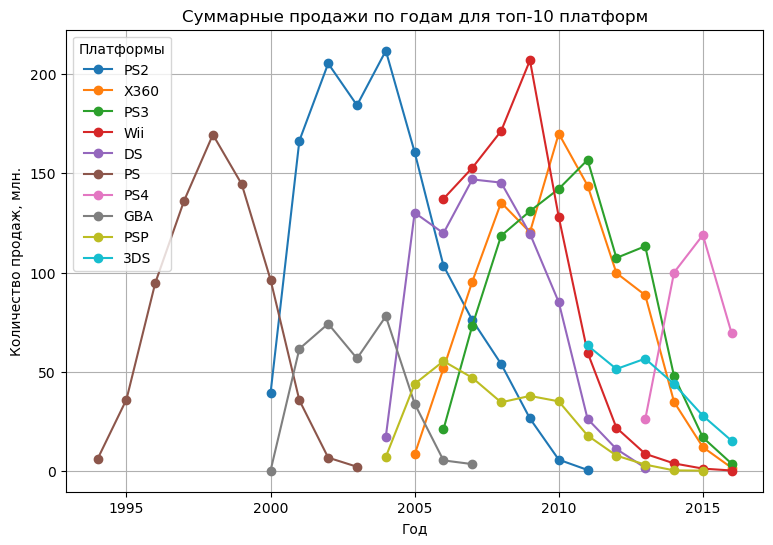

In [48]:
# Создание общего графика и наложение данных
# Настройка размера графика
plt.figure(figsize=(9, 6))  

for name in ids:
    plt.plot(
        games_df
        .query('platform == @name and year_of_release >= 1994')
        .groupby('year_of_release')['all_sales']
        .agg(['sum']
    ), marker='o', label=name)

# Настройка легенды
plt.legend(title='Платформы')

# Остальные настройки графика
plt.title('Суммарные продажи по годам для топ-10 платформ')
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн.')
plt.grid(True)

plt.show()

На графике суммарные продажи отображены по каждой платформе отдельно. Мы видим, что начиная с 2003 года стали появлятся новые платформы: X360, PS3, Wii, DS, PS4, PSP, 3DS, которые вытеснили самые продаваемые - PS2 и PS на предыдущем временном периоде (начиная с 2011 года продаж по этим платформам нет совсем). Пик суммарных продаж игр под игровую платформу PS была примерно в 2003, а все продажи с 1993 по 2003 год. Для PS2 с 2000 по 2012 год, пик суммарных продаж игр под эту платформу в 2004 году 

Так же мы можем заметить, что ближе к 2015 году и эти платформы тоже постепенно снизились по продажам, возможно, это связано с тем, что стали появляться еще более новые игровые платформы, по которым показатель общей суммарной продажи игр еще не успел набрать высоких значений, и поэтому они не попали в нашу статистику. Например, под такое описание вполне может попасть PS4, продажи по которой начались после 2012 года и стали расти к 2015 году.

Посмотрим, игры на каких платформах больше всего продавались c 2012 года без ограничений по платформам.


In [49]:
# Список 10-ти платформ с максимальными суммарными продажами
ids_from_2012 = games_df.query('year_of_release >= 2012')['platform'].unique()
ids_from_2012


array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

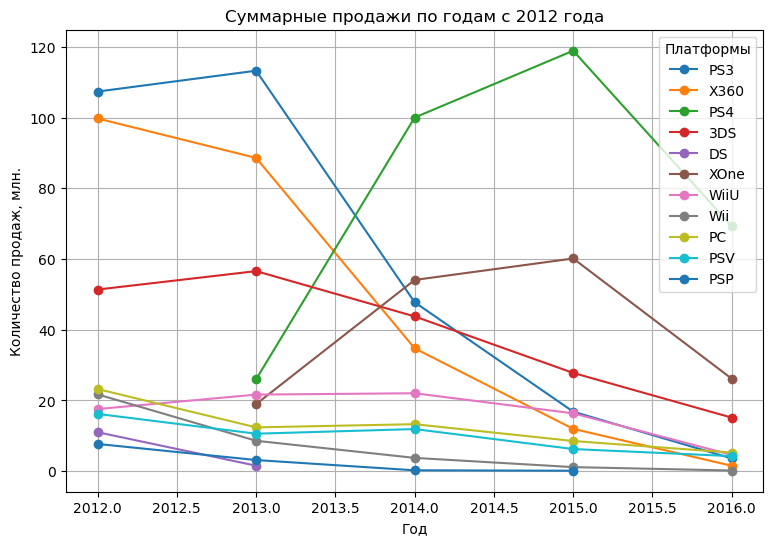

In [50]:
# Создание общего графика и наложение данных
# Настройка размера графика
plt.figure(figsize=(9, 6))  

for name in ids_from_2012:
    plt.plot(
        games_df
        .query('platform == @name and year_of_release >= 2012')
        .groupby('year_of_release')['all_sales']
        .agg(['sum']
    ), marker='o', label=name)

# Настройка легенды
plt.legend(title='Платформы')

# Остальные настройки графика
plt.title('Суммарные продажи по годам c 2012 года')
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн.')
plt.grid(True)

plt.show()

К уже анализируемым ранее платформам - X360, PS3, Wii, DS, PS4, PSP, 3DS, добавились новые. По графику можно подтвердить наше предположение, что после 2013 года появились игровые платформы PS4 и XOne, игры под которые стали наиболее продаваемыми в этот период.


In [51]:
# Комментарий ревьюера
temp = games_df.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1

time_life['life'].median()

7.0

Характерным сроком, за который платформа проходит свой "жизненный цикл" и устаревает, можно назвать период в 7 лет.

Так же можно заметить, что показатели в 2016 году по всем платформам идут вниз.


Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Более старые данные неактуальны в связи с тем, что платформы, для которых они были созданы уже устарели. Статистика по продажам подтвержает это утверждение - платформы устаревают за 6-7 лет, а начиная с 2013 года стали развиваться новые платформы, игры на которые будут пользоваться большей популярностью.

Но и очень короткий период не подходит для прогнозирования, так что выбираем золотую середину 2013 год.


Наиболее актуальным период для анализа данных по продажам игр можно назвать период **с 2013 по 2016 год**. Эти данные помогут построить прогноз на 2017 год. 

**Сформируем срез данных за период с 2013 года, в дальнейшем будет работать именно с ним.**



### Формирование среза данных за период 2013-2016 гг (включительно)

In [52]:
data = games_df.query('year_of_release >= 2013')
print(data.shape[0])

data.head(20)


2233


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NA,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NA,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NA,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NA,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


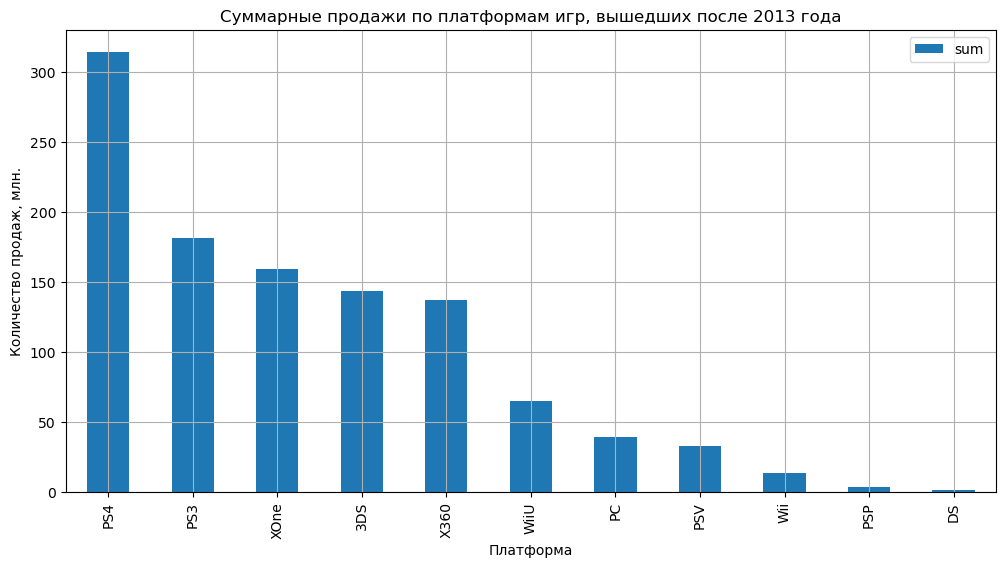

In [53]:
# Построение графика частоты встречаемости platform в датафрейме users_df
draw_bar(
     data.groupby('platform')['all_sales'].agg(['sum']).sort_values(by='sum', ascending = False),
    'Суммарные продажи по платформам игр, вышедших после 2013 года',
    'Платформа',
    'Количество продаж, млн.'
)



Платформы лидирующие по продажам в сформированном срезе данных: PS4, PS3, XOne, 3DS и X360.

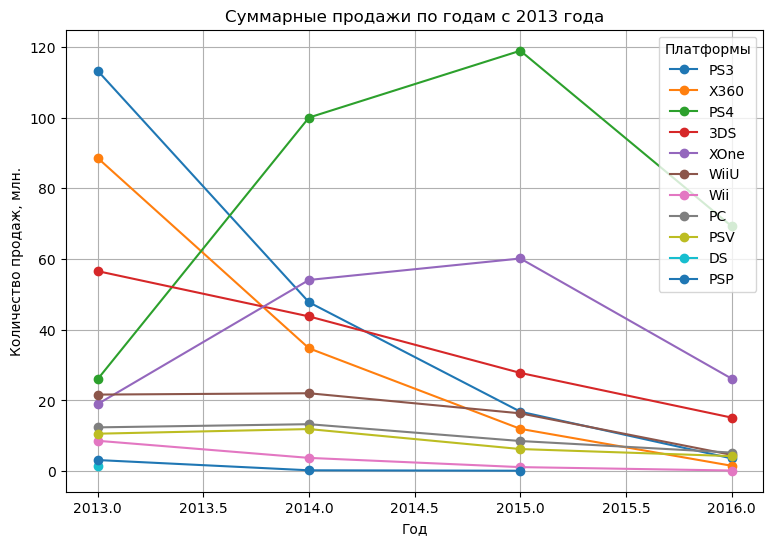

In [54]:
# Список уникальных названий платформ
ids_actual = data['platform'].unique()

# Создание общего графика и наложение данных
# Настройка размера графика
plt.figure(figsize=(9, 6))  

for name in ids_actual:
    plt.plot(
        data
        .query('platform == @name')
        .groupby('year_of_release')['all_sales']
        .agg(['sum']
    ), marker='o', label=name)

# Настройка легенды
plt.legend(title='Платформы')

# Остальные настройки графика
plt.title('Суммарные продажи по годам c 2013 года')
plt.xlabel('Год')
plt.ylabel('Количество продаж, млн.')
plt.grid(True)

plt.show()

При этом продажи по PS3, X360 и 3DS стали падать после 2013 года, в то время как продажи для платформ PS4 и XOne - растут. 

Посмотрим общую статистику продаж игр по платформам с 2013 года. Топ-5 выведем отдельно, остальные все объединим в группу - "Другие".

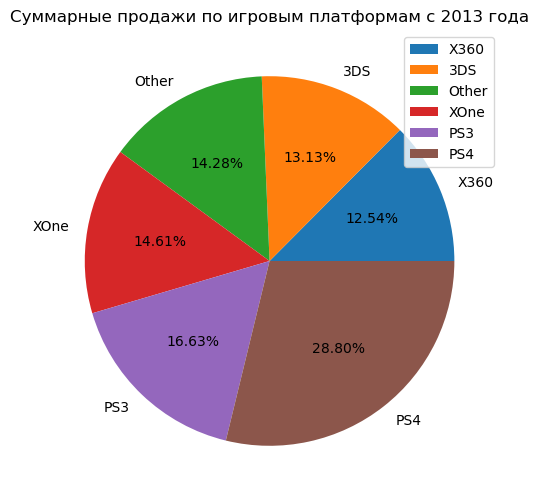

In [55]:
# Построение диаграммы
draw_pie(
    create_top_5_pie_data(data, 'platform', 'all_sales'),
    'Суммарные продажи по игровым платформам с 2013 года'
)


PS4 и XOne выглядят как потенциально прибыльные платформы. Так же в список актуальных платформ стоит добавить - PS3, X360 и 3DS, которые имели наивысший суммарный доход от продаж игр в период с 2013 года 

In [56]:
actual_platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']


### График "ящик с усами" по глобальным продажам игр в разбивке по платформам

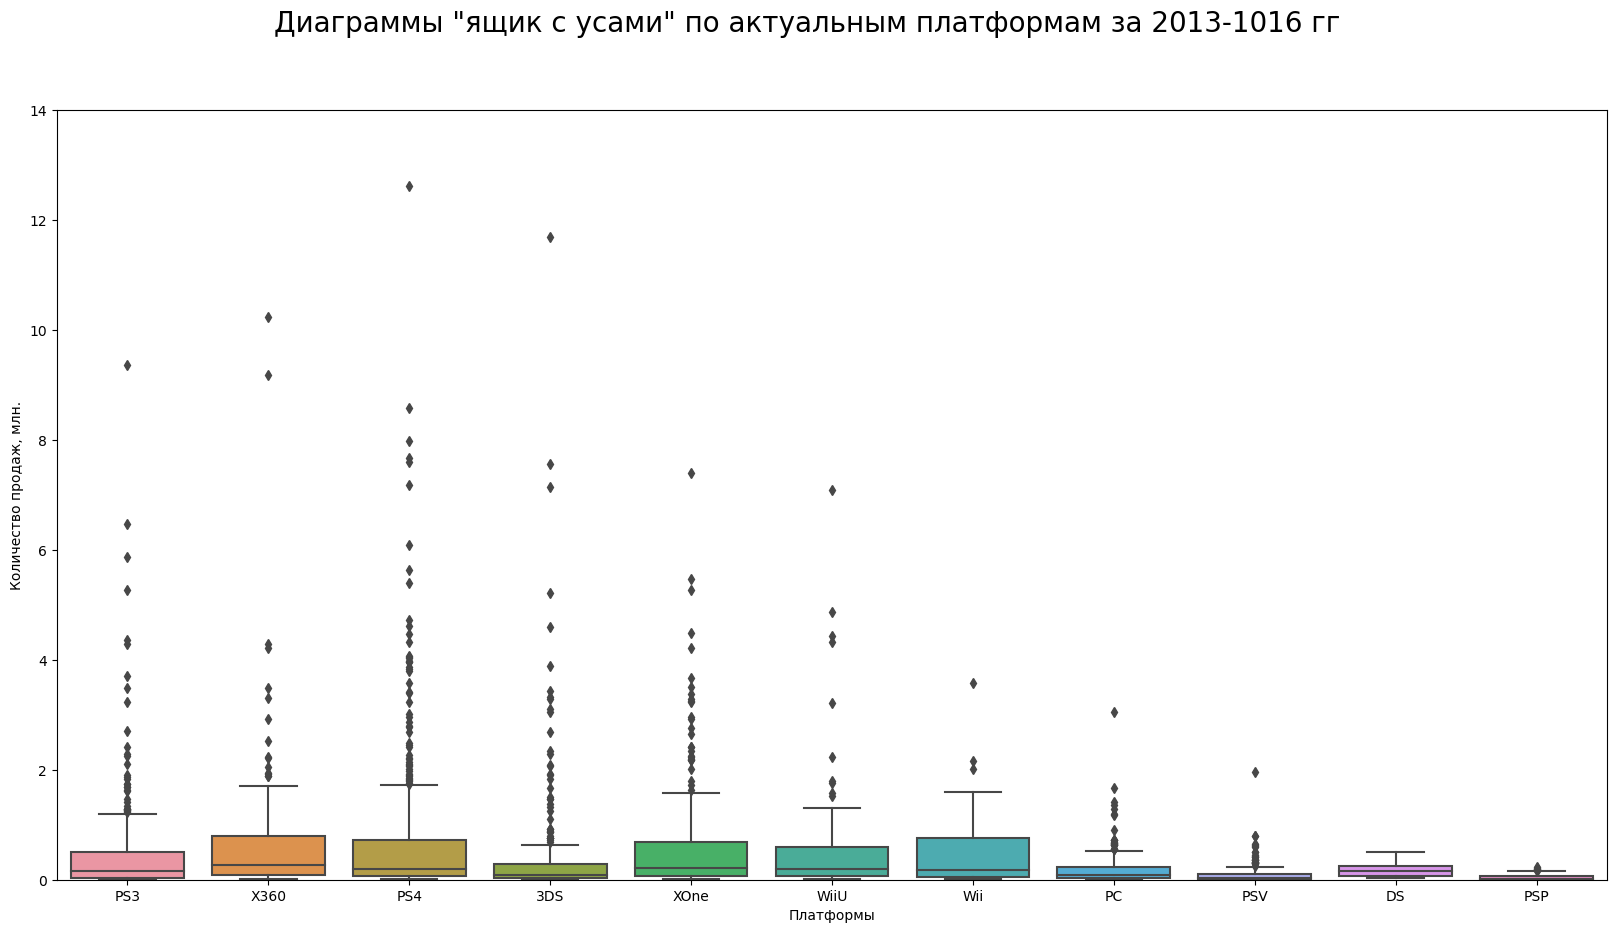

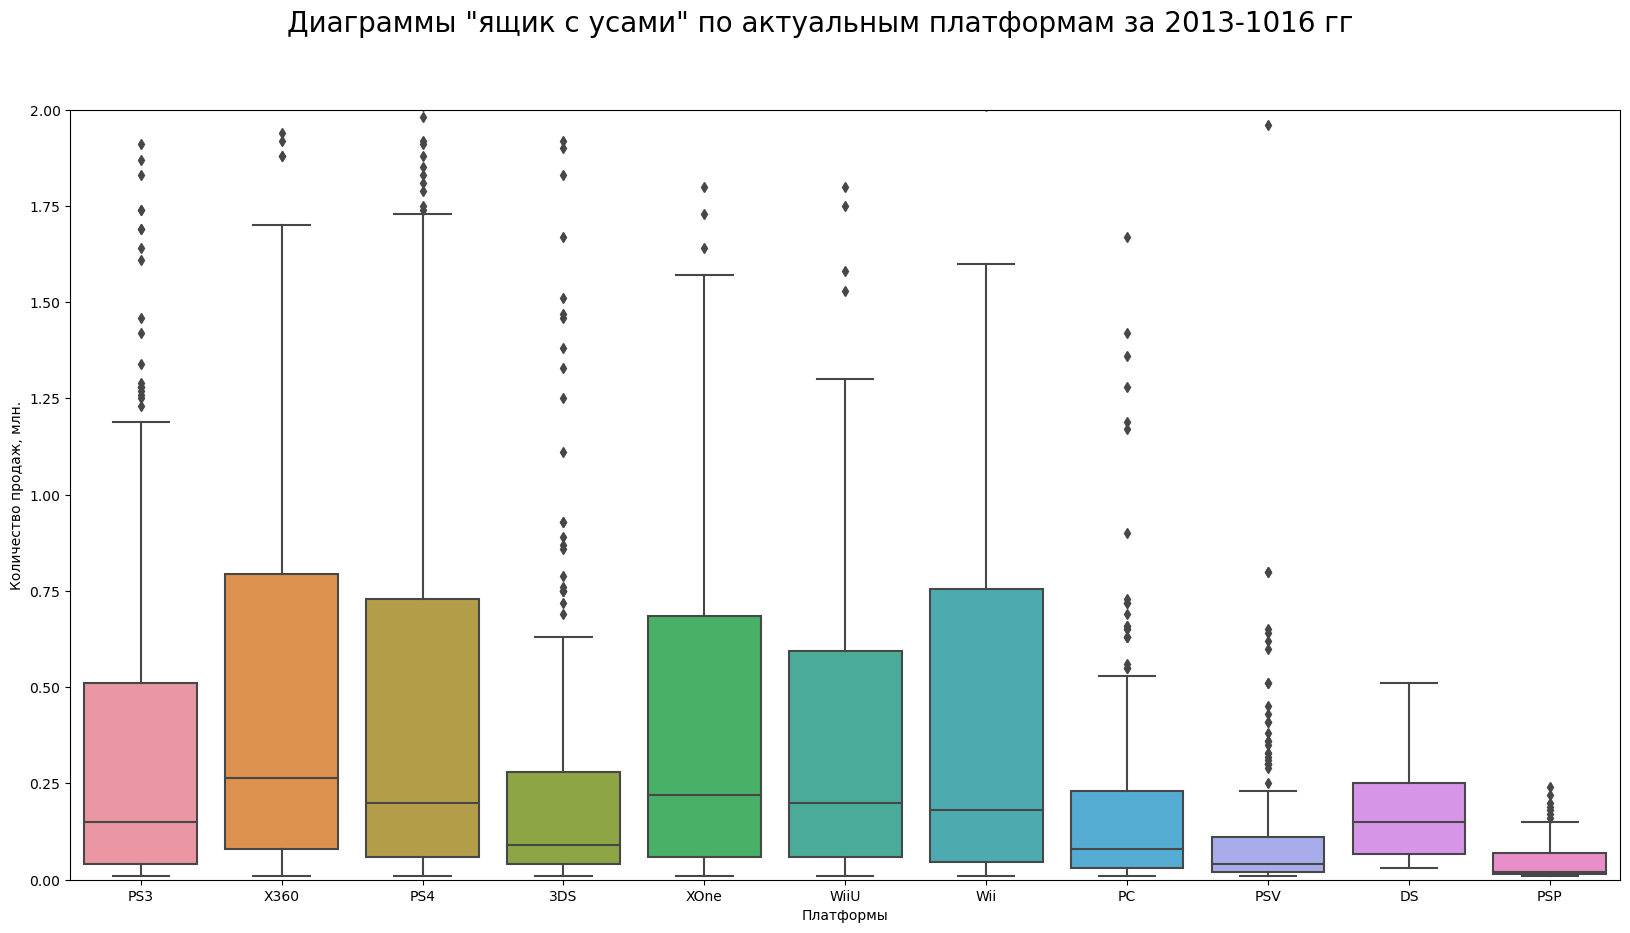

In [57]:
plt.figure(figsize=(20, 10))
#create seaborn boxplots by group
sns.boxplot(x='platform', y='all_sales', data=data, ) 

plt.ylim(0, 14)
plt.suptitle('Диаграммы "ящик с усами" по актуальным платформам за 2013-1016 гг', fontsize=20)
plt.ylabel("Количество продаж, млн.", fontsize=10)
plt.xlabel("Платформы", fontsize=10)

plt.show()

plt.figure(figsize=(20, 10))
#create seaborn boxplots by group
sns.boxplot(x='platform', y='all_sales', data=data, ) 

plt.ylim(0, 2)
plt.suptitle('Диаграммы "ящик с усами" по актуальным платформам за 2013-1016 гг', fontsize=20)
plt.xlabel("Платформы", fontsize=10)
plt.ylabel("Количество продаж, млн.", fontsize=10)

plt.show()



Все ящики располагаются в пределах от 0 до примерно 0.75 млн. копий суммарных продаж. 
Их мединанные значения колеблются до 0.25. Самые высокие медианные значения у платформ X360, XOne и PS4 - близко к 0.25 млн. Самые низкие у PSP и PSV. Медина показывает колебание среднего значения продаж по платформам, получается что в среднем игра на платформах X360, XOne и PS4 имеет больше продаж.

Самый широкий межквартильный размах у платформ - PS4, Wii, X360 и XOne.

Самые длинне "усы размаха" у платформ - PS4, Wii, X360 и XOne, это означает, что разброс значений у них выше. Значит более высокие объемы продаж для этих платформ вполне ожидаемы, нежели для других платформ.

### Влияние отзывов на продажи по платформе

Сформируем срез данных игр по платформе `PS4` - согласно раннее проведенным исследованиям самая популярная платформа за весь период с 2013 года.

In [58]:
data_ps4 = data.loc[data['platform'] == "PS4"]


In [59]:
print(len(data_ps4.dropna(subset=['user_score'])))
print(len(data_ps4.dropna(subset=['critic_score'])))
print(len(data_ps4.dropna(subset=['user_score', 'critic_score'])))

257
252
249


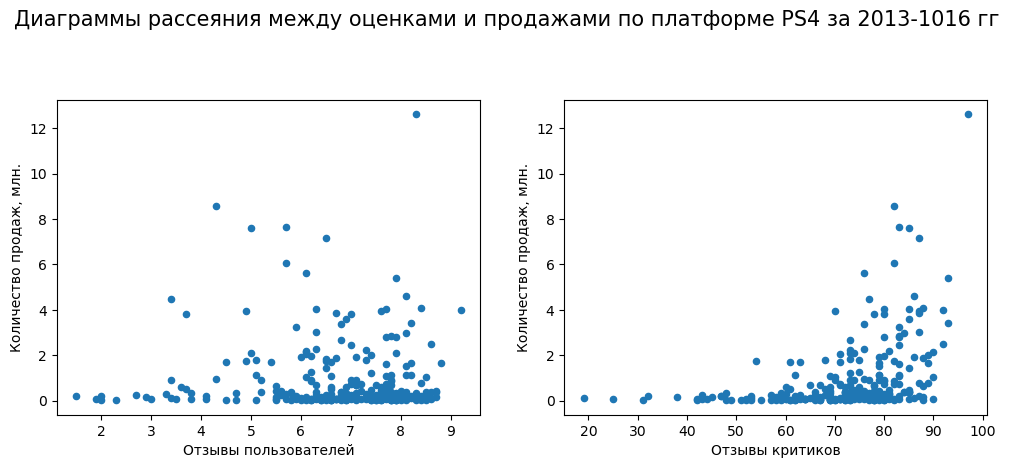

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.152447,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.020933,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.048925,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.171332,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.035639,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.557654,0.406568
user_score,0.152447,-0.020933,-0.048925,0.171332,-0.035639,0.557654,1.000000,-0.031957
all_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.031957,1.000000


In [60]:
plt.figure(figsize=(12, 9))
plt.suptitle('Диаграммы рассеяния между оценками и продажами по платформе PS4 за 2013-1016 гг', fontsize=15)
    
plt.subplot(2,2,1)
data_ps4.plot(x='user_score', y='all_sales', kind='scatter', ax=plt.gca())
plt.ylabel("Количество продаж, млн.", fontsize=10)
plt.xlabel("Отзывы пользователей", fontsize=10)

plt.subplot(2,2,2)
data_ps4.plot(x='critic_score', y='all_sales', kind='scatter', ax=plt.gca())
plt.ylabel("Количество продаж, млн.", fontsize=10)
plt.xlabel("Отзывы критиков", fontsize=10)

plt.show()

display(data_ps4[['year_of_release','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','all_sales']].corr())



Коэффициент корреляции между оценками пользователей и общими продажами - `-0.03` - связь отсуствует.

Коэффициент корреляции между оценками критиков и общими продажами - `0.41` - умеренная положительная связь. Корреляция не ярко выражена, но она есть.

Посмотри коэффициенты корреляции и матрицы рассеяния по другим отобранным ранее платформам - `PS3`, `XOne`, `3DS`, `X360`, которые мы считаем наиболее актуальными в текущий момент.

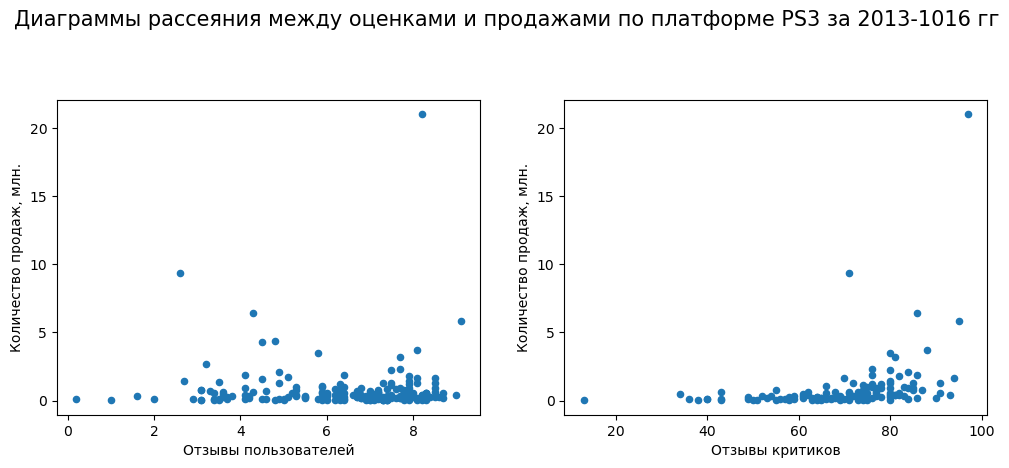

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.217596,-0.167604,-0.195894,-0.181897,-0.167495,-0.270341,-0.201274
na_sales,-0.217596,1.000000,0.874896,0.439867,0.932098,0.335205,-0.013560,0.954921
eu_sales,-0.167604,0.874896,1.000000,0.443809,0.975743,0.309561,-0.022848,0.974740
jp_sales,-0.195894,0.439867,0.443809,1.000000,0.459609,0.302327,0.244048,0.516258
other_sales,-0.181897,0.932098,0.975743,0.459609,1.000000,0.315748,0.004633,0.989812
critic_score,-0.167495,0.335205,0.309561,0.302327,0.315748,1.000000,0.599920,0.334285
user_score,-0.270341,-0.013560,-0.022848,0.244048,0.004633,0.599920,1.000000,0.002394
all_sales,-0.201274,0.954921,0.974740,0.516258,0.989812,0.334285,0.002394,1.000000


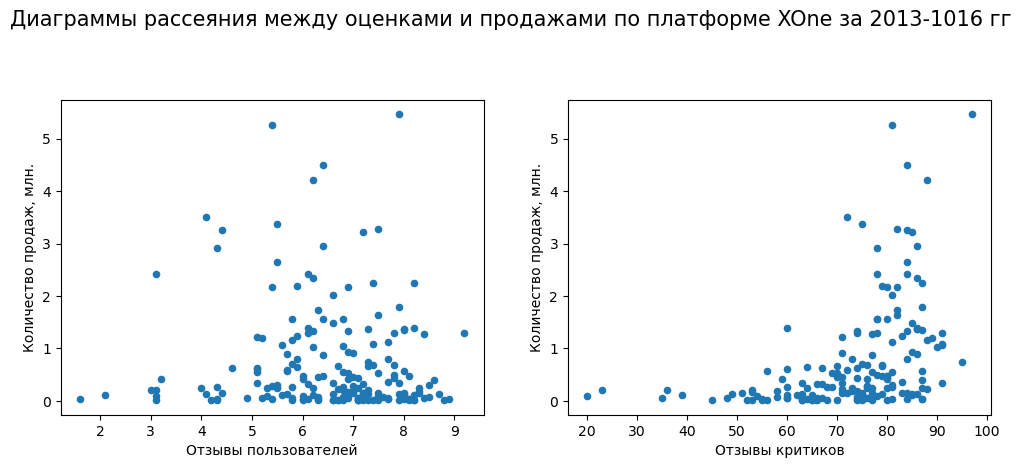

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.242667,-0.194925,-0.127050,-0.243414,0.063712,0.079481,-0.239183
na_sales,-0.242667,1.000000,0.765367,0.425725,0.988088,0.388636,-0.069318,0.970433
eu_sales,-0.194925,0.765367,1.000000,0.421071,0.852986,0.379162,-0.055911,0.898045
jp_sales,-0.127050,0.425725,0.421071,1.000000,0.441717,0.202954,0.069591,0.452701
other_sales,-0.243414,0.988088,0.852986,0.441717,1.000000,0.411825,-0.069645,0.995238
critic_score,0.063712,0.388636,0.379162,0.202954,0.411825,1.000000,0.472462,0.416998
user_score,0.079481,-0.069318,-0.055911,0.069591,-0.069645,0.472462,1.000000,-0.068925
all_sales,-0.239183,0.970433,0.898045,0.452701,0.995238,0.416998,-0.068925,1.000000


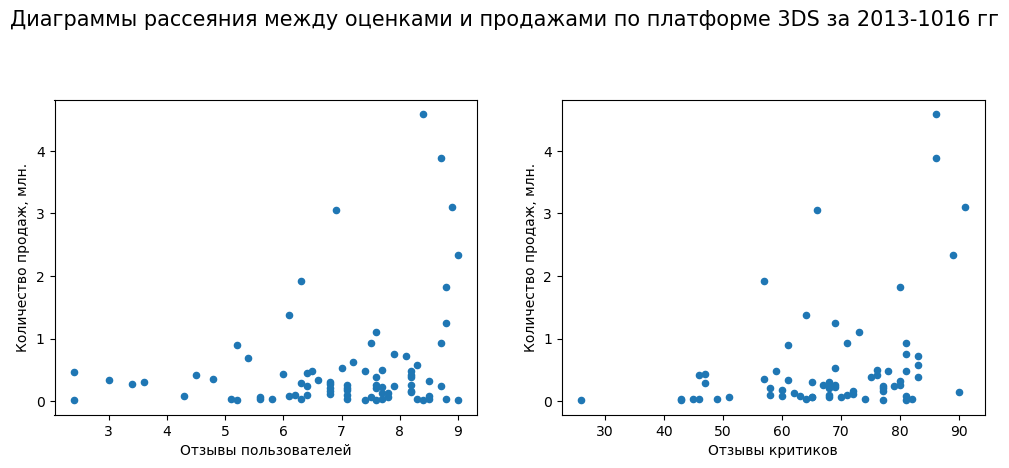

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.075933,-0.115177,-0.063487,-0.083695,0.166254,0.240047,-0.090086
na_sales,-0.075933,1.000000,0.931893,0.641878,0.993708,0.369653,0.241036,0.938867
eu_sales,-0.115177,0.931893,1.000000,0.633982,0.958274,0.268851,0.114930,0.927821
jp_sales,-0.063487,0.641878,0.633982,1.000000,0.645306,0.301810,0.259370,0.854173
other_sales,-0.083695,0.993708,0.958274,0.645306,1.000000,0.354365,0.209418,0.945649
critic_score,0.166254,0.369653,0.268851,0.301810,0.354365,1.000000,0.769536,0.357057
user_score,0.240047,0.241036,0.114930,0.259370,0.209418,0.769536,1.000000,0.241504
all_sales,-0.090086,0.938867,0.927821,0.854173,0.945649,0.357057,0.241504,1.000000


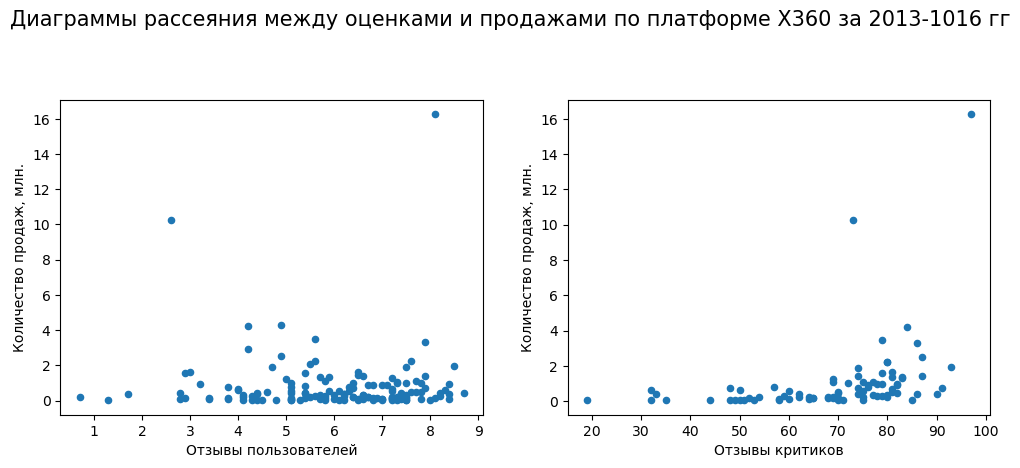

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.218293,-0.203537,-0.285360,-0.218199,-0.245439,-0.248736,-0.220495
na_sales,-0.218293,1.000000,0.866574,0.634340,0.985236,0.342724,-0.012298,0.984299
eu_sales,-0.203537,0.866574,1.000000,0.612002,0.934769,0.336418,-0.009435,0.941008
jp_sales,-0.285360,0.634340,0.612002,1.000000,0.641529,0.290613,0.112592,0.648860
other_sales,-0.218199,0.985236,0.934769,0.641529,1.000000,0.349204,-0.018868,0.998640
critic_score,-0.245439,0.342724,0.336418,0.290613,0.349204,1.000000,0.520946,0.350345
user_score,-0.248736,-0.012298,-0.009435,0.112592,-0.018868,0.520946,1.000000,-0.011742
all_sales,-0.220495,0.984299,0.941008,0.648860,0.998640,0.350345,-0.011742,1.000000


In [61]:
for name in actual_platforms:

    if name == 'PS4':
        continue
        
    data_tmp = data.loc[data['platform'] == name]
    

    plt.figure(figsize=(12, 9))
    plt.suptitle('Диаграммы рассеяния между оценками и продажами по платформе ' + name + ' за 2013-1016 гг', fontsize=15)
    
    plt.subplot(2,2,1)
    data_tmp.plot(x='user_score', y='all_sales', kind='scatter', ax=plt.gca())
    plt.ylabel("Количество продаж, млн.", fontsize=10)
    plt.xlabel("Отзывы пользователей", fontsize=10)

    plt.subplot(2,2,2)
    data_tmp.plot(x='critic_score', y='all_sales', kind='scatter', ax=plt.gca())
    plt.ylabel("Количество продаж, млн.", fontsize=10)
    plt.xlabel("Отзывы критиков", fontsize=10)

    plt.show()
 
    display(data_tmp[['year_of_release','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','all_sales']].corr())

   


Пользовательские оценки почти не влияют на суммарные продажи игр, за исключением платформы 3DS - коэффициент корреляции 0.24, очень слабая зависимость есть (причем по всем регионам отдельно тоже наблюдается похожая взаимосвязь). По всем остальным платформам коэффициент корреляции меньше 0.1.

Оценки критиков умеренно влияют на продажи игр. Чаще всего коэффициент корреляции около 0.4. Значит чем выше оценка критиков, тем выше продажи игры. Соотвественно эти оценки важно учитывать при формировании пула игр на продажу в новом году. 



### Распределение игр по жанрам

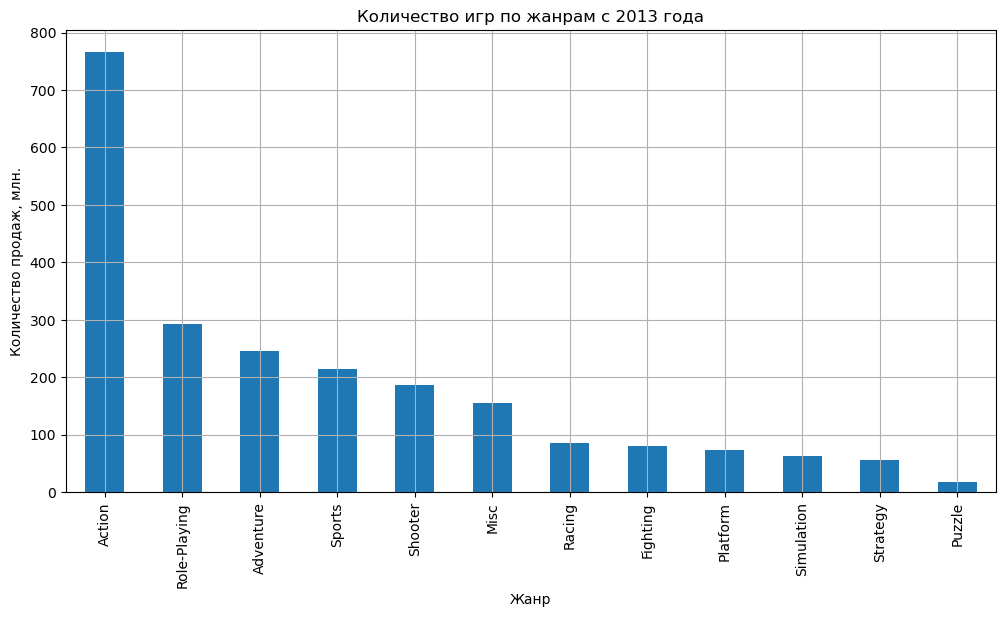

In [62]:
# Построение графика частоты встречаемости жанров в играх
draw_bar(
    data['genre'].value_counts(),
    'Количество игр по жанрам с 2013 года',
    'Жанр',
    'Количество продаж, млн.'
)


Больше всего игр в жанре `Action` - это довольно популярный жанр компьютерных игр, в которых основной акцент делается на скорость реакции геймера.
Преимущества получает тот, кто может быстрее вводить команды и постоянно следить за тем, что происходит на экране. Если речь идёт о команде, то очень важна также координация действий игроков между собой. То есть ставка делается на физические способности самого геймера. Если победа обеспечивается благодаря более быстрой реакции или же способности лучше прицелиться, такой проект можно смело относить к экшену. 

Так же в топ-5 входят игры с типом:
- `Sports` - спортивные симуляторы.
- `Misc`
- `Adventure`
- `Role-Playing` - жанр видеоигр, подразумевающий контроль игрока над одним или несколькими персонажами, от лица которых игрок может совершать нарративные выборы.

Меньше всего игра в жанре `Platform` - это жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня.

Так мало игр в жанре `Puzzle` и `Strategy`.

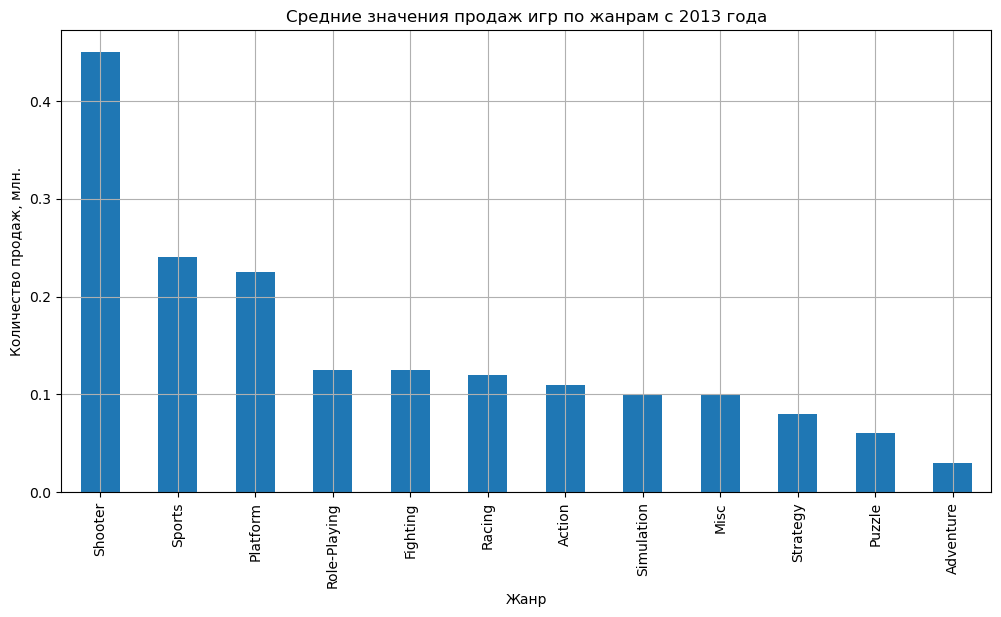

In [63]:
# Построение графика распределения суммарных продаж игр по жанрам
draw_bar(
    data.groupby('genre')['all_sales'].median().sort_values(ascending = False),
    'Средние значения продаж игр по жанрам с 2013 года',
    'Жанр',
    'Количество продаж, млн.'
)



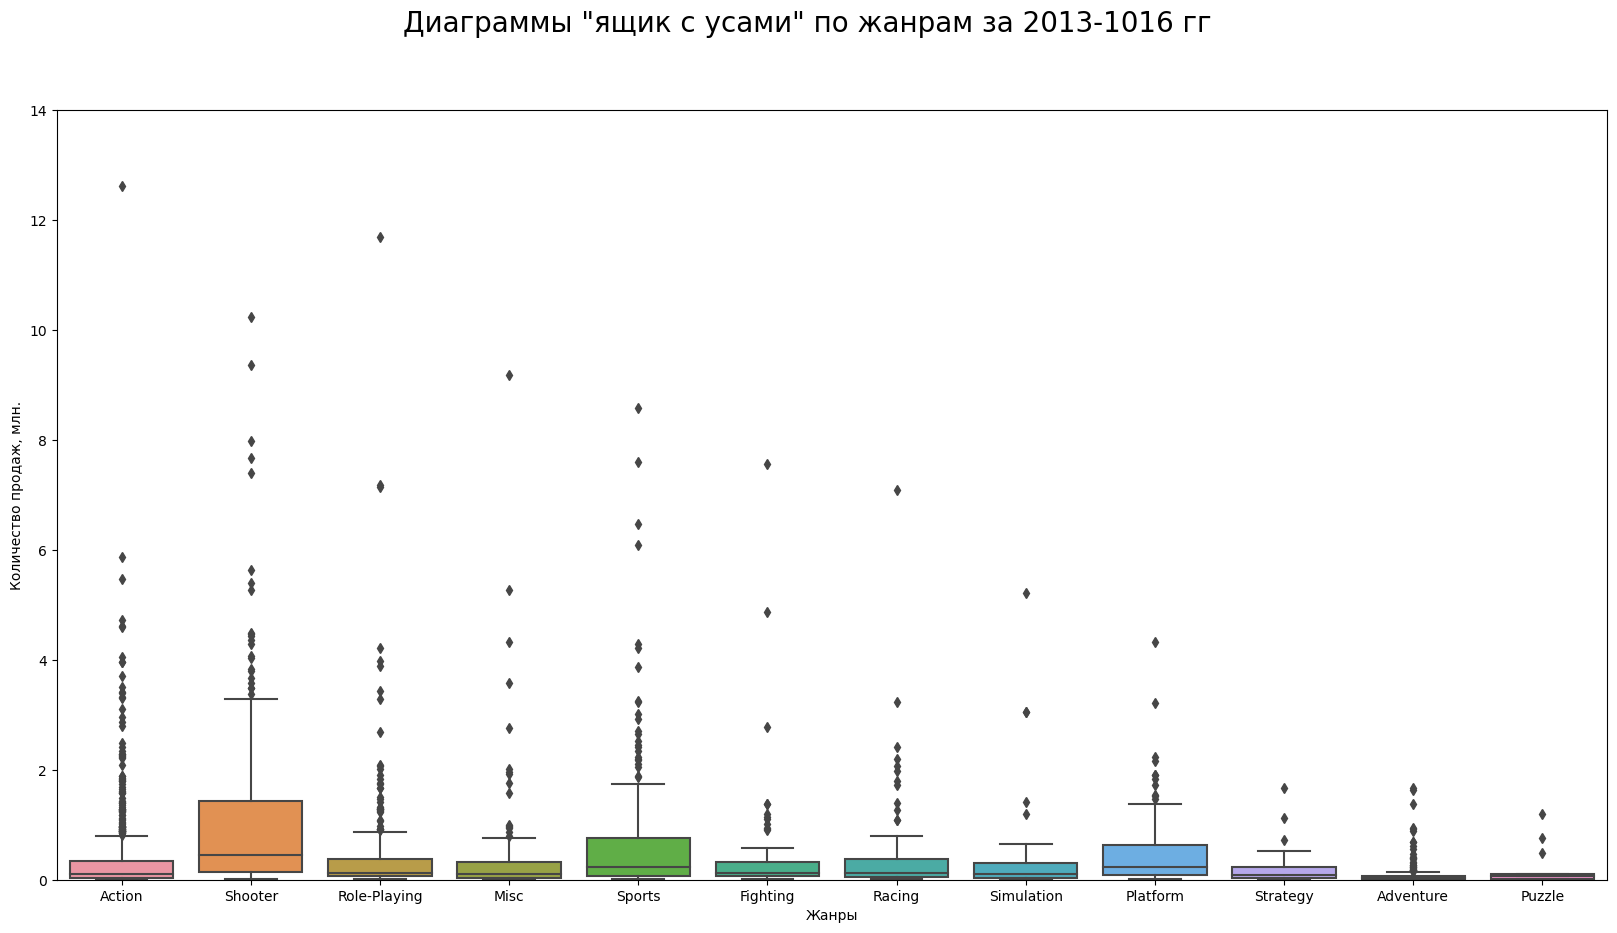

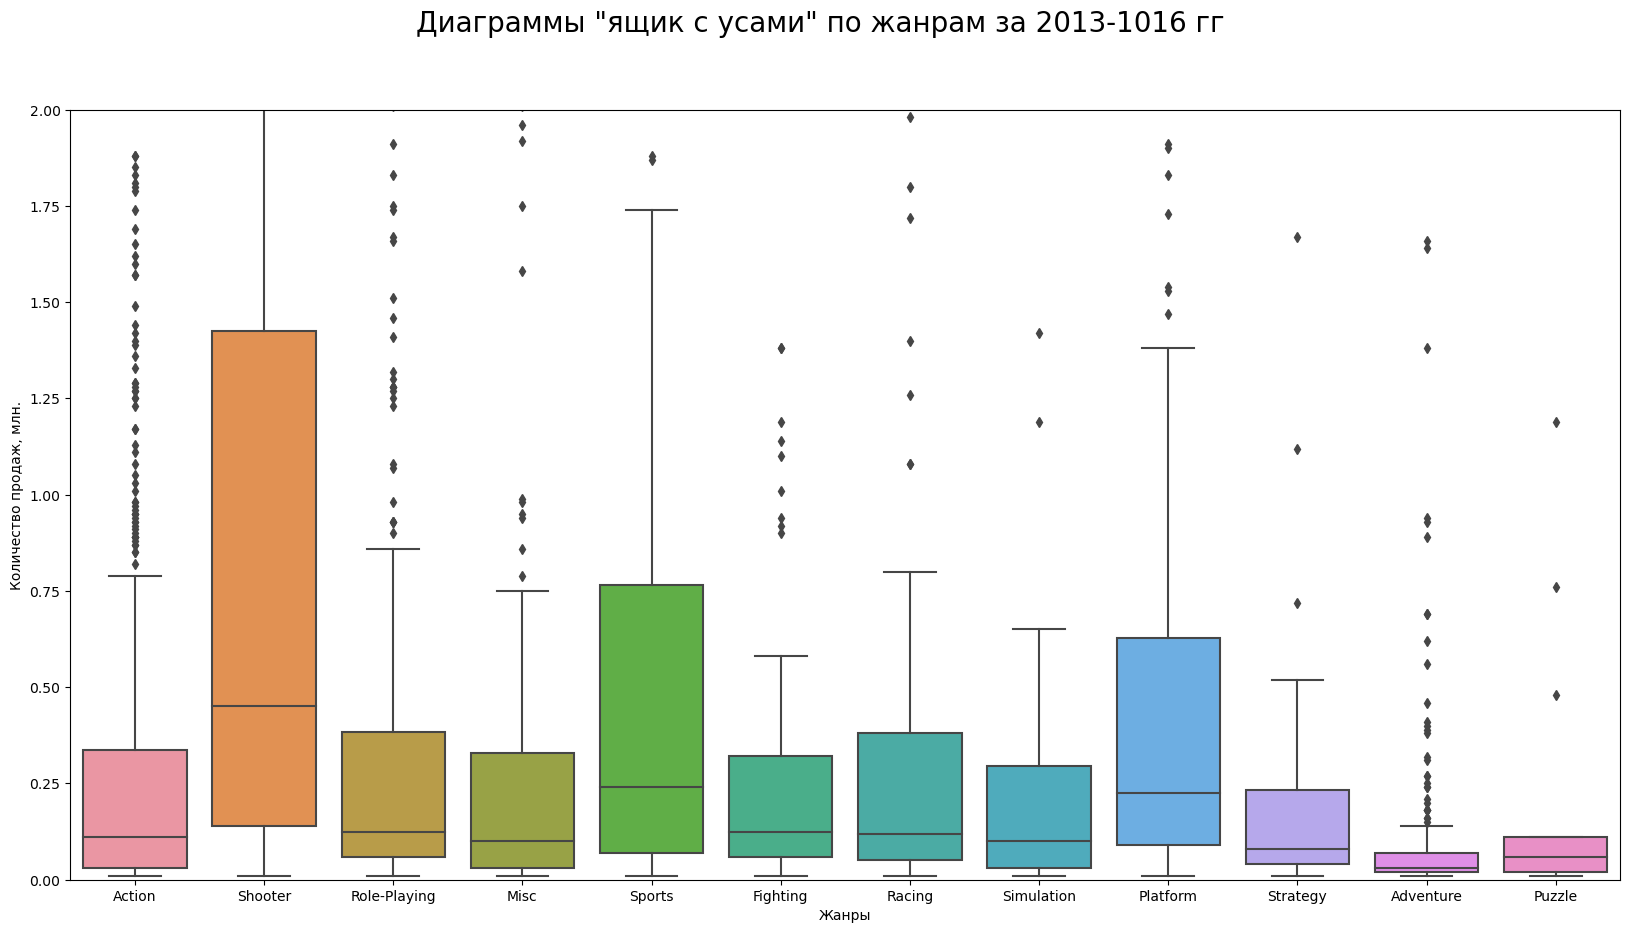

In [64]:
plt.figure(figsize=(20, 10))
#create seaborn boxplots by group
sns.boxplot(x='genre', y='all_sales', data=data, ) 

plt.ylim(0, 14)
plt.suptitle('Диаграммы "ящик с усами" по жанрам за 2013-1016 гг', fontsize=20)
plt.xlabel("Жанры", fontsize=10)
plt.ylabel("Количество продаж, млн.", fontsize=10)

plt.show()

plt.figure(figsize=(20, 10))
#create seaborn boxplots by group
sns.boxplot(x='genre', y='all_sales', data=data, ) 

plt.ylim(0, 2)
plt.suptitle('Диаграммы "ящик с усами" по жанрам за 2013-1016 гг', fontsize=20)
plt.xlabel("Жанры", fontsize=10)
plt.ylabel("Количество продаж, млн.", fontsize=10)

plt.show()

В топ-5 самых продаваемых жанров игр суммарно по всем регионам входят. 

- `Shooter`
- `Sports`
- `Role-Playing`
- `Fighting`

Их медианные значения самые высокие, у них самые широкие ящики и длинные усы.

Бесспорный лидер - игры в жанре `Shooter`.

Меньше всего продаются игры в жанре:
- `Strategy` - жанр игры, в котором игроку для победы необходимо применять стратегическое мышление. В популярных играх такого жанра игроку часто предлагается играть не за конкретного персонажа, а за их условные массы, к примеру, руководить строительством города или командовать целыми армиями в военных кампаниях.
- `Puzzle` -  жанр компьютерных игр, целью которых является решение логических задач, требующих от игрока задействования логики, стратегии и интуиции.
- `Adventure` - жанр компьютерных игр, представляющий собой интерактивную историю с главным героем, управляемым игроком.

### Вывод

В интернет-магазине "Стримчик" есть игры начиная с 1980 года. Больше всего игр было выпущено в 2006-2007 годах. Основная масса дат релизов игр лежит в диапазоне с 2003 по 2010 год. 

Список платформ с самыми высокими продажами игр по всему объему данных: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS.
Максимальный объем продаж игр по этим платформам достигается в районе 2008-2009 года. 

Начиная с 2003 года стали появляться платформы: X360, PS3, Wii, DS, PS4, PSP, 3DS, которые вытеснили самые продаваемые - PS2 и PS на предыдущем временном периоде. 
Так же мы можем заметить, что ближе к 2015 году и эти платформы тоже постепенно снизились по продажам, после 2013 года появились игровые платформы PS4 и XOne, игры под которые стали наиболее продаваемыми в этот период.

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Более старые данные неактуальны в связи с тем, что платформы, для которых они были созданы уже устарели. Статистика по продажам подтвержает это утверждение - платформы устаревают за 6-7 лет, а начиная с 2013 года стали развиваться новые платформы, игры на которые будут пользоваться большей популярностью.

Наиболее актуальным период для анализа данных по продажам игр можно назвать период с 2013 по 2016 год. Эти данные помогут построить прогноз на 2017 год. 

Самые высокие медианные значения у платформ X360, XOne и PS4 - близко к 0.25 млн. Самые низкие у PSP и PSV. Медина показывает колебание среднего значения продаж по платформам, получается что в среднем игра на платформах X360, XOne и PS4 имеет больше продаж.

Платформы PS4, Wii, X360 и XOne имеют самый большой разброс значений. Значит более высокие объемы продаж для этих платформ вполне ожидаемы, нежели для других платформ.

Пользовательские оценки почти не влияют на суммарные продажи игр. 

Оценки критиков умерено влияют на продажи игр, чем выше оценка критиков, тем больше продаж игры.

Самое большое количество игр в интернет-магазине в жанре: Action, Sports, Misc, Adventure, Role-Playing.

Меньше всего игр в жанре Platform, Puzzle и Strategy.

Самыми продаваемыми по всем регионам можно назвать игры в жанре: Shooter, Sports, Role-Playing и Fighting.

Меньше всего продаются игры в жанре Strategy, Puzzle и Adventure.



## Портрет пользователя каждого региона: Северная Америка, Европа и Япония.

### Топ-5 самых популярных платформ

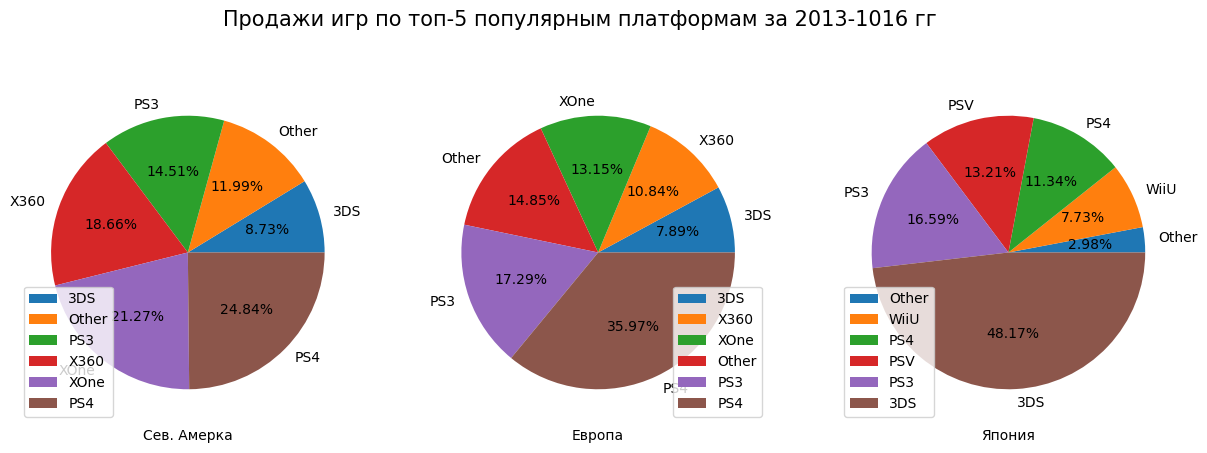

In [65]:
plt.figure(figsize=(15, 5))
plt.suptitle('Продажи игр по топ-5 популярным платформам за 2013-1016 гг', fontsize=15)
    
plt.subplot(1,3,1)
(
    create_top_5_pie_data(data, 'platform', 'na_sales')
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Сев. Амерка", fontsize=10)
plt.ylabel('')

plt.subplot(1,3,2)
(
    create_top_5_pie_data(data, 'platform', 'eu_sales')
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Европа", fontsize=10)
plt.ylabel('')

plt.subplot(1,3,3)
(
    create_top_5_pie_data(data, 'platform', 'jp_sales')
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Япония", fontsize=10)
plt.ylabel('')

plt.show()


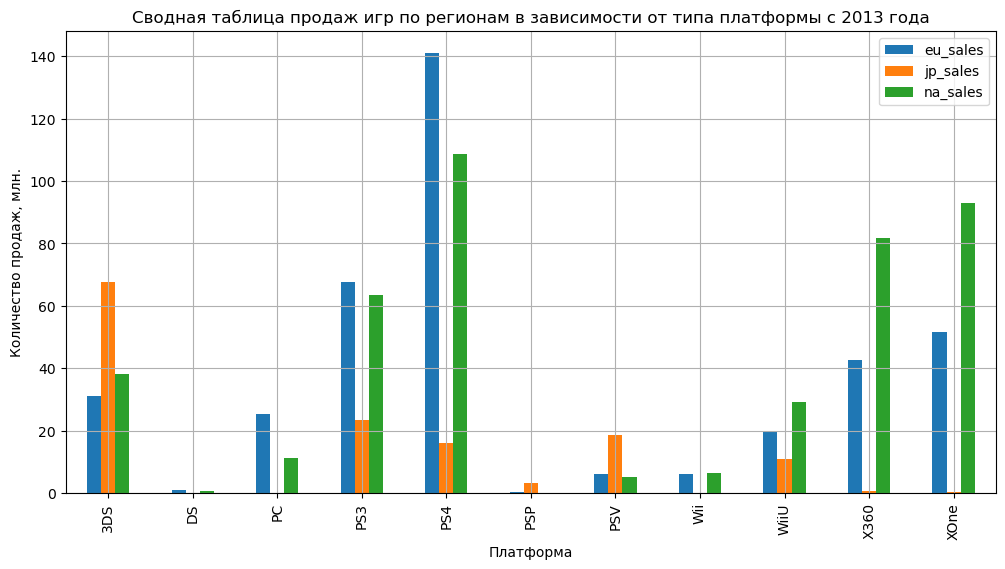

In [66]:
# Сводная таблица продаж игр по регионам в зависимости от типа платформы
draw_bar(
    data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'),
    'Сводная таблица продаж игр по регионам в зависимости от типа платформы с 2013 года',
    'Платформа',
    'Количество продаж, млн.'
)


Самые большие продажи игр производятся среди пользователей Северной Америки, потом идут пользователи Европы, и уже после пользователи Японии. Что в целом вполне логично, учитывая население регионов.

Пользователи Северной Америки и Европы чаще всего покупают игры под пристаку `PS4`, `XOne`, `PS3` и `X360`; пользователи Японии - `3DS`, `PS3`,  и `PSV`. 

Пользователи Японии чаще всего используют портативные приставки `3DS`, вкусы у пользователей Европы и Северной Америки в целом совпадают - `X360`, `XOne`, `PS4` и `PS3`.

Жители всех регионом почти не покупают игры под платформы: `DS`, `PSP`, `Wii`.

### Топ-5 самых популярных жанров игр

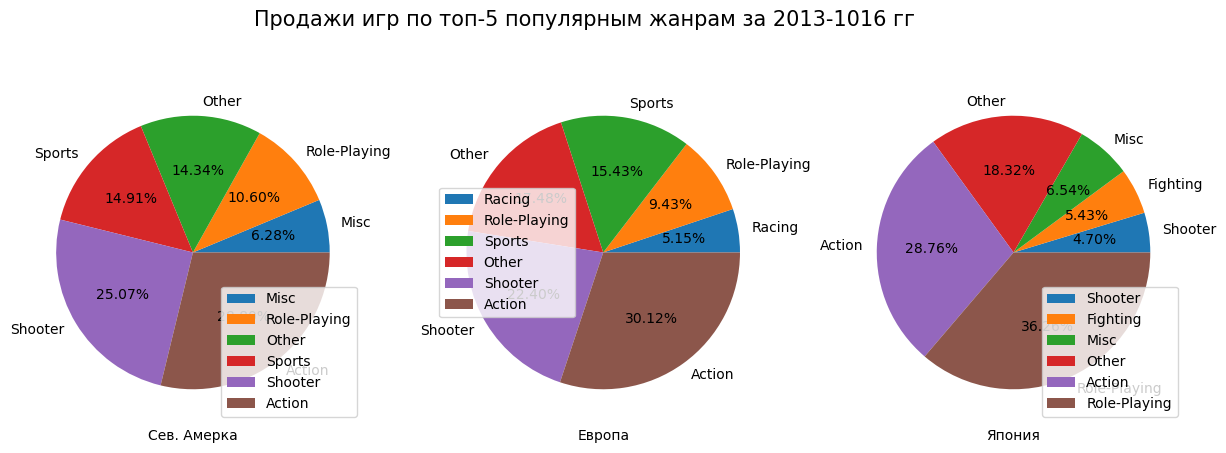

In [67]:
plt.figure(figsize=(15, 5))
plt.suptitle('Продажи игр по топ-5 популярным жанрам за 2013-1016 гг', fontsize=15)
    
plt.subplot(1,3,1)
(
    create_top_5_pie_data(data, 'genre', 'na_sales')
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Сев. Амерка", fontsize=10)
plt.ylabel('')

plt.subplot(1,3,2)
(
    create_top_5_pie_data(data, 'genre', 'eu_sales')
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Европа", fontsize=10)
plt.ylabel('')

plt.subplot(1,3,3)
(
    create_top_5_pie_data(data, 'genre', 'jp_sales')
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Япония", fontsize=10)
plt.ylabel('')

plt.show()


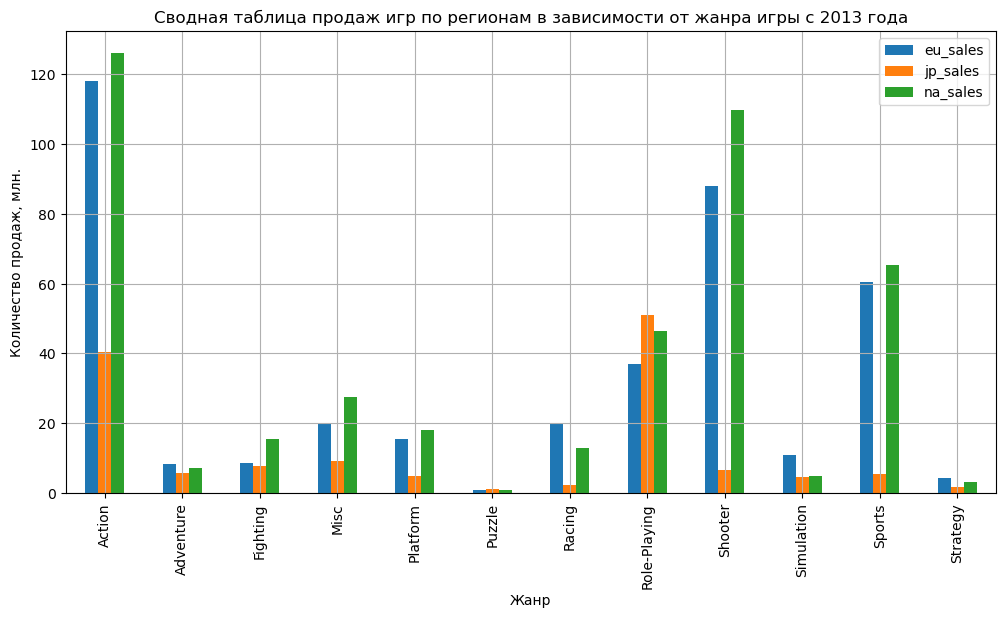

In [68]:
# Сводная таблица продаж игр по регионам в зависимости от жанра игры
draw_bar(
    data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'),
    'Сводная таблица продаж игр по регионам в зависимости от жанра игры с 2013 года',
    'Жанр',
    'Количество продаж, млн.'
)


Пользователи Северной Америки и Европы чаще всего покупают игры в жанре `Action`, `Sports` и `Shooter` - их предпочтения полностью совпадают; пользователи Японии - `Role-Playing`, `Action` и `Misc`. 

Вероятнее всего такая разница связана с культурой разных регионов. Американцы и европейцы сильно отличаются от жителей Азии.

Менее прибыльными жанрами игр можно назвать: `Puzzle`, `Strategy` и `Adventure`, их продажи самые маленькие.

### Зависимость продаж от рейтинга ESRB в отдельном регионе

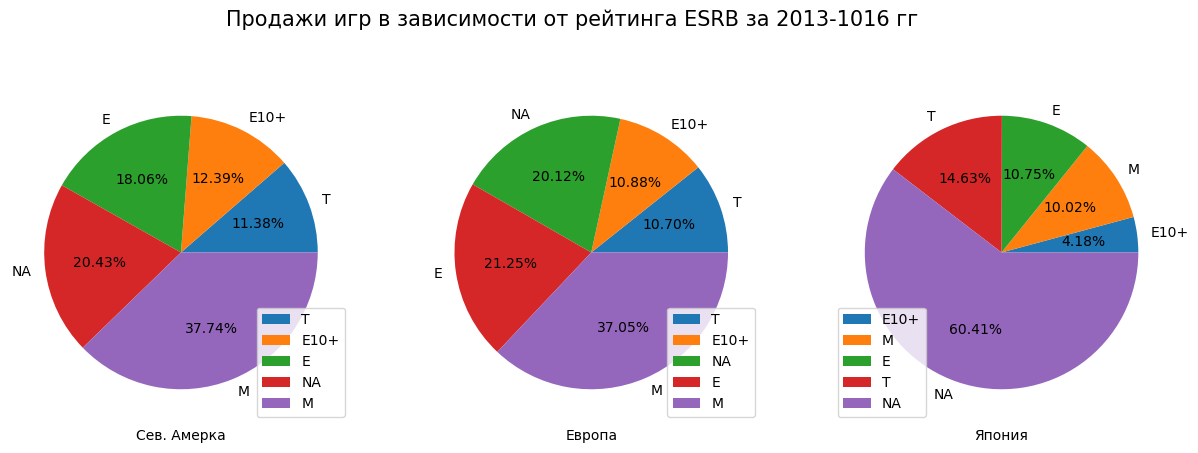

In [69]:
plt.figure(figsize=(15, 5))
plt.suptitle('Продажи игр в зависимости от рейтинга ESRB за 2013-1016 гг', fontsize=15)
    
plt.subplot(1,3,1)
(
    data
    .groupby('rating')['na_sales']
    .sum()
    .sort_values()
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Сев. Амерка", fontsize=10)
plt.ylabel('')

plt.subplot(1,3,2)
(
    data
    .groupby('rating')['eu_sales']
    .sum()
    .sort_values()
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Европа", fontsize=10)
plt.ylabel('')

plt.subplot(1,3,3)
(
    data
    .groupby('rating')['jp_sales']
    .sum()
    .sort_values()
    .plot(
        kind='pie', 
        autopct='%.2f%%',
        legend=True,
        ax=plt.gca(),
    )
)
plt.xlabel("Япония", fontsize=10)
plt.ylabel('')

plt.show()


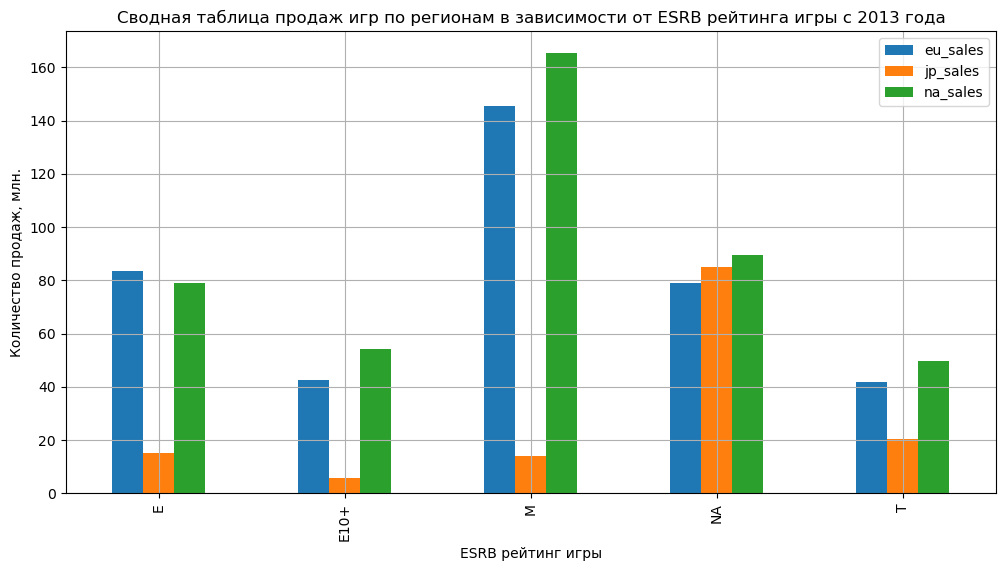

In [70]:
# Сводная таблица продаж игр по регионам в зависимости от ESRB рейтинга игры
draw_bar(
    data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum'),
    'Сводная таблица продаж игр по регионам в зависимости от ESRB рейтинга игры с 2013 года',
    'ESRB рейтинг игры',
    'Количество продаж, млн.'
)


В Северной Америке и в Европе больше всего покупают игры с рейтингом `M` - `Для взрослых`, около 40% всех продаж. Я Японии лидруют игры без рейтинга, мы уже ранее выясняли, что только игры Америки и Канады получают рейтинг ESRB, возможно японцы играют в игры местных компаний или каких-либо других стран. Кстати в Америке и  Европе тоже много скачиваний игр без рейтинга ESRB.


### Вывод

Самые большие продажи игр производятся среди пользователей Северной Америки, потом идут пользователи Европы, и уже после пользователи Японии. Что в целом вполне логично, учитывая население регионов.

Пользователи Северной Америки и Европы чаще всего покупают игры под пристаку `X360`, `XOne`, `PS4` и `PS3`; пользователи Японии - предпочитают портативную приставки `DS`, а так же консоль `PS4`. 

Пользователи Северной Америки и Европы чаще всего покупают игры в жанре `Action`, `Sports` и `Shooter` - их предпочтения полностью совпадают; пользователи Японии - `Role-Playing`, `Action` и `Misc`. 

Менее популярными жанрами игр можно назвать: `Puzzle`, `Strategy` и `Adventure`, их продажи самые маленькие.

Больше всего покупают игры с рейтингом `М` - `Для взрослых` в Северной Америке и без рейтинга в Японии.



## Проверка гипотез

In [71]:
# Статистический уровень значимости
alpha = 0.05


In [72]:
# Срез данных - записи, у которых в параметре user_score не пропущено значение
data_stat = data.loc[(~ data['user_score'].isna())]

### Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- **Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC равны.
- **Альтернативная гипотеза**: средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для того, что отвергнуть нулевую гипотезу, необходимо провести T-тест, и если значение p-value будет меньше уровня статистической значимости, то нулевая гипотеза отвергается в пользу альтернативной гипотезы.
В противном случае говорят, что у нас недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу.

В гипотезе сравниваются две выборки двух генеральных совокупностей, значит необходимо использовать T-тест - `stats.ttest_ind()`.

Альтернативная гипотеза двусторонняя, поэтому явно передавать параметр `alternative="two-sided"` не будем, он используется по умолчанию.

In [73]:
results = stats.ttest_ind(
    data_stat.query('platform == "XOne"')['user_score'], 
    data_stat.query('platform == "PC"')['user_score'], 
    equal_var=False
)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.14759594013430463
Нет оснований отвергнуть нулевую гипотезу


**Вывод:** Полученное значение p-value больше заданного уровня значимости, поэтому у нас недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны.

In [74]:
print('Cредние пользовательские рейтинги платформ XOne - {:.2f}'.format(data_stat.query('platform == "XOne"')['user_score'].mean()))
print('Cредние пользовательские рейтинги платформ PC - {:.2f}'.format(data_stat.query('platform == "PC"')['user_score'].mean()))

Cредние пользовательские рейтинги платформ XOne - 6.52
Cредние пользовательские рейтинги платформ PC - 6.27


### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Для того, что отвергнуть нулевую гипотезу, необходимо провести T-тест, и если значение p-value будет меньше уровня статистической значимости, то нулевая гипотеза отвергается в пользу альтернативной гипотезы.
В противном случае говорят, что у нас недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу.

В гипотезе сравниваются две выборки двух генеральных совокупностей, значит необходимо использовать T-тест - `stats.ttest_ind()`.

Альтернативная гипотеза двусторонняя, поэтому явно передавать параметр `alternative="two-sided"` не будем, он используется по умолчанию.

- **Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports равны.
- **Альтернативная гипотеза**: средние пользовательские рейтинги жанров Action и Sports не равны.

Для того, что отвергнуть нулевую гипотезу, необходимо провести T-тест, и если значение p-value будет меньше уровня статистической значимости, то нулевая гипотеза отвергается в пользу альтернативной гипотезы.
В противном случае говорят, что у нас недостаточно оснований для того, чтобы отвергнуть нулевую гипотезу.

В гипотезе сравниваются две выборки двух генеральных совокупностей, значит необходимо использовать T-тест - `stats.ttest_ind()`.

Альтернативная гипотеза двусторонняя, поэтому явно передавать параметр `alternative="two-sided"` не будем, он используется по умолчанию.

In [75]:
results = stats.ttest_ind(
    data_stat.query('genre == "Action"')['user_score'], 
    data_stat.query('genre == "Sports"')['user_score'], 
    equal_var=False
)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод**: Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, средние пользовательские рейтинги жанров Action и Sports не равны.

In [76]:
print('Cредние пользовательские рейтинги жанров Action - {:.2f}'.format(data_stat.query('genre == "Action"')['user_score'].mean()))
print('Cредние пользовательские рейтинги жанров Sports - {:.2f}'.format(data_stat.query('genre == "Sports"')['user_score'].mean()))

Cредние пользовательские рейтинги жанров Action - 6.84
Cредние пользовательские рейтинги жанров Sports - 5.24


### Вывод

Гипотеза "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" отверается в пользу альтернативной гипотезы "средние пользовательские рейтинги платформ Xbox One и PC разные". 

Полученное значение p-value при выполнении T-теста меньше заданного уровня значимости, поэтому есть основания говорить, что **средние пользовательские рейтинги платформ Xbox One и PC не равны**.

Действительно:

Cредние пользовательские рейтинги платформ XOne - 6.52

Cредние пользовательские рейтинги платформ PC - 6.83


Гипотеза "средние пользовательские рейтинги жанров Action и Sports одинаковые" отверается в пользу альтернативной гипотезы "средние пользовательские рейтинги жанров Action и Sports разные". 

Полученное значение p-value при выполнении T-теста меньше заданного уровня значимости, поэтому есть основания говорить, что **средние пользовательские рейтинги жанров Action и Sports не равны**.


Действительно:

Cредние пользовательские рейтинги жанров Action - 6.88

Cредние пользовательские рейтинги жанров Sports - 6.42

Так же стоит добавить, что почти половина всех данных была с пропущенным значением в параметре `Пользовательский рейтинг`, поэтому исследование нельзя назвать до конца достоверным. 


## Общий вывод

В вашем распоряжении были данные интернет-магазина "Стримчик", который продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (Путь к файлу: [/datasets/games.csv](https://code.s3.yandex.net/datasets/games.csv)).

Было необходимо провести исследовательский анализ данных, который поможет спрогнозировать кампанию на 2017 год.

**Описание данных:**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Предварительный анализ и обработка данных**

Данные от интернет-магазина "Стримчик" были не в самом хорошем виде.
Столбцы имели некрасивые названия, были проблемы с типом данных, а так же наблюдалось большое количество данных с пропущенными значениями некоторых параметров. Почти в половине всех строк отсутствуют значения `Оценка пользователей`, `Оценка критиков` и `Рейтинг от организации ESRB`. 

Названия столбцов и их типы были подкорректированы в соотвествии со значениями данных. 

Были подкорректированы некоторые пропущенные значения:
- удалены строки с пропусками в поле `Название игры`.
- удалены строки с пропусками в поле `Год выпуска игры`.
- в поле `Оценка пользователя` значения 'tbd' изменены на Nan, так как по сути это такие же пропуски.
- пропуски в полях `Оценка пользователей` и `Оценка критиков` оставили без изменений, удаление таких больших данных плохо повлияет на качество результатов исследования.
- в поле `Рейтинг от организации ESRB` пропуски заменены на значение 'NA' - не определено, подкорректированы данные и названия согласно классификации по организации ESRB.

Вероятнее всего разработчикам интернет-магазина "Стримчик" необходимо найти на сторонных сайтах информацию о рейтингах и оценках, и пополнить свои данные для большей наглядности и удобства пользователей.

**Исследовательский анализ данных**

В интернет-магазине "Стримчик" есть игры начиная с 1980 года. Больше всего игр было выпущено в 2006-2007 годах. Основная масса дат релизов игр лежит в диапазоне с 2003 по 2010 год.

Список платформ с самыми высокими продажами игр по всему объему данных: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. Максимальный объем продаж игр по этим платформам достигается в районе 2008-2009 года.

Начиная с 2003 года стали появляться платформы: X360, PS3, Wii, DS, PS4, PSP, 3DS, которые вытеснили самые продаваемые - PS2 и PS на предыдущем временном периоде. Так же мы можем заметить, что ближе к 2015 году и эти платформы тоже постепенно снизились по продажам, после 2013 года появились игровые платформы PS4 и XOne, игры под которые стали наиболее продаваемыми в этот период.

Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватим уже отжившие тренды. Более старые данные неактуальны в связи с тем, что платформы, для которых они были созданы уже устарели. Статистика по продажам подтвержает это утверждение - платформы устаревают за 6-7 лет, а начиная с 2013 года стали развиваться новые платформы, игры на которые будут пользоваться большей популярностью.

Наиболее актуальным период для анализа данных по продажам игр можно назвать период с **2013 по 2016** год. Эти данные помогут построить прогноз на 2017 год.

Самые высокие медианные значения у платформ **X360, XOne и PS4** - близко к 0.25 млн. Самые низкие у PSP и PSV. Медина показывает колебание среднего значения продаж по платформам, получается что в среднем игра на платформах X360, XOne и PS4 имеет больше продаж.

Платформы **PS4, Wii, X360 и XOne** имеют самый большой разброс значений. Значит более высокие объемы продаж для этих платформ вполне ожидаемы, нежели для других платформ.

Пользовательские оценки почти не влияют на суммарные продажи игр.

Оценки критиков умерено влияют на продажи игр, чем выше оценка критиков, тем больше продаж игры.

Самое большое количество игр в интернет-магазине в жанре: Action, Sports, Misc, Adventure, Role-Playing.

Меньше всего игр в жанре Platform, Puzzle и Strategy.

Самыми продаваемыми по всем регионам можно назвать игры в жанре: **Shooter, Sports, Role-Playing и Fighting**.

Меньше всего продаются игры в жанре Strategy, Puzzle и Adventure.

**Портрет пользователя каждого региона**

Самые большие продажи игр производятся среди пользователей Северной Америки, потом идут пользователи Европы, и уже после пользователи Японии. Что в целом вполне логично, учитывая население регионов.

Пользователи **Северной Америки и Европы** чаще всего покупают игры под пристаку **X360, XOne, PS4 и PS3**; пользователи **Японии** - предпочитают портативные приставки **3DS, а так же консоль PS4**.

Пользователи **Северной Америки и Европы** чаще всего покупают игры **в жанре Action, Sports и Shooter** - их предпочтения полностью совпадают; пользователи **Японии - Role-Playing, Action и Misc**.

Менее прибыльными жанрами игр можно назвать: Puzzle, Strategy и Adventure, их продажи самые маленькие.

**Больше всего покупают игры с рейтингом M, E и без рейтинга ESRB**.

**Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC равны, и средние пользовательские рейтинги жанров Action и Sports так же не равны.**


**Для компании на 2017 год было бы рационально закупить игры на консоли `PS4`, `XOne`, а так же портативную консоль `3DS`, на которую людят покупать игры пользователи из Японии.
Так же из игр лучше делать предпочтение для жанров `Shooter`, `Action` и `Sport` - это самые популярые жанры игры.
При выборе игр можно руководствоваться оценками критиков, потому что эти оценки влияют на количество продаж игры.
Рейтинг ESRB в целом не имеет значения, но можно учитывать, что жители Северной Америки и Европы часто покупают игры с рейтингом `М - Для взрослых`, что в общем то очень вяжется с популярным жанром - `Shooter`**